In [1]:
#Importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
from datetime import date,timedelta

import scipy.stats as stats
from scipy.stats import (ttest_ind,shapiro,kstest,levene,bartlett,mannwhitneyu)
from statsmodels.stats.power import tt_ind_solve_power
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
# Read CSV file
control = pd.read_csv("control_group.csv",sep=';')
test= pd.read_csv("test_group.csv",sep=';')

In [3]:
control.head()

Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3          340.0  
4            NaN

In [4]:
test.head()

Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4            768

In [5]:
# Renaming the columns for better understanding 
control.columns=['campaign_name','date','amount_spend','impressions','reach','website_clicks','searches','view_content','add_to_cart','purchases']
test.columns=['campaign_name','date','amount_spend','impressions','reach','website_clicks','searches','view_content','add_to_cart','purchases']

In [6]:
print(control.shape)
print(test.shape)

(30, 10)
(30, 10)


In [7]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   30 non-null     object 
 1   date            30 non-null     object 
 2   amount_spend    30 non-null     int64  
 3   impressions     29 non-null     float64
 4   reach           29 non-null     float64
 5   website_clicks  29 non-null     float64
 6   searches        29 non-null     float64
 7   view_content    29 non-null     float64
 8   add_to_cart     29 non-null     float64
 9   purchases       29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [8]:
control['date']=pd.to_datetime(control['date'],dayfirst=True)

In [9]:
control.describe().T

count                 mean                  min  \
date              30  2019-08-15 12:00:00  2019-08-01 00:00:00   
amount_spend    30.0          2288.433333               1757.0   
impressions     29.0        109559.758621              71274.0   
reach           29.0         88844.931034              42859.0   
website_clicks  29.0          5320.793103               2277.0   
searches        29.0          2221.310345               1001.0   
view_content    29.0          1943.793103                848.0   
add_to_cart     29.0               1300.0                442.0   
purchases       29.0           522.793103                222.0   

                                25%                  50%                  75%  \
date            2019-08-08 06:00:00  2019-08-15 12:00:00  2019-08-22 18:00:00   
amount_spend                 1945.5               2299.5               2532.0   
impressions                 92029.0             113430.0             121332.0   
reach                       74192.0              91579.0             102479.0   
website_clicks               4085.0               5224.0               6628.0   
searches                     1615.0               2390.0               2711.0   
view_content                 1249.0               1984.0               2421.0   
add_to_cart                   930.0               1339.0               1641.0   
purchases                     372.0                501.0                670.0   

                                max           std  
date            2019-08-30 00:00:00           NaN  
amount_spend                 3083.0    367.334451  
impressions                145248.0  21688.922908  
reach                      127852.0  21832.349595  
website_clicks               8137.0   1757.369003  
searches                     4891.0    866.089368  
view_content                 4219.0    777.545469  
add_to_cart                  1913.0    407.457973  
purchases                     800.0    185.028642

In [10]:
control.isnull().sum()

campaign_name     0
date              0
amount_spend      0
impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchases         1
dtype: int64

In [11]:
# handle missing values in control 
control.iloc[:,3:]=control.iloc[:,3:].fillna(control.iloc[:,3:].median())

In [12]:
# convert float columns to int
for column in control.columns[3:]:
    control[column]=control[column].round().astype('int64')

In [13]:
control.isnull().sum()

campaign_name     0
date              0
amount_spend      0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchases         0
dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_name   30 non-null     object
 1   date            30 non-null     object
 2   amount_spend    30 non-null     int64 
 3   impressions     30 non-null     int64 
 4   reach           30 non-null     int64 
 5   website_clicks  30 non-null     int64 
 6   searches        30 non-null     int64 
 7   view_content    30 non-null     int64 
 8   add_to_cart     30 non-null     int64 
 9   purchases       30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [15]:
test.describe().T

count          mean           std      min       25%      50%  \
amount_spend     30.0   2563.066667    348.687681   1968.0   2324.50   2584.0   
impressions      30.0  74584.800000  32121.377422  22521.0  47541.25  68853.5   
reach            30.0  53491.566667  28795.775752  10598.0  31516.25  44219.5   
website_clicks   30.0   6032.333333   1708.567263   3038.0   4407.00   6242.5   
searches         30.0   2418.966667    388.742312   1854.0   2043.00   2395.5   
view_content     30.0   1858.000000    597.654669    858.0   1320.00   1881.0   
add_to_cart      30.0    881.533333    347.584248    278.0    582.50    974.0   
purchases        30.0    521.233333    211.047745    238.0    298.00    500.0   

                     75%       max  
amount_spend     2836.25    3112.0  
impressions     99500.00  133771.0  
reach           78778.75  109834.0  
website_clicks   7604.75    8264.0  
searches         2801.25    2978.0  
view_content     2412.00    2801.0  
add_to_cart      1148.50    1391.0  
purchases         701.00     890.0

In [16]:
test['date']=pd.to_datetime(test['date'],dayfirst=True)

In [17]:
df = pd.concat([control,test])

In [18]:
df.head()

campaign_name       date  amount_spend  impressions   reach  \
0  Control Campaign 2019-08-01          2280        82702   56930   
1  Control Campaign 2019-08-02          1757       121040  102513   
2  Control Campaign 2019-08-03          2343       131711  110862   
3  Control Campaign 2019-08-04          1940        72878   61235   
4  Control Campaign 2019-08-05          1835       113430   91579   

   website_clicks  searches  view_content  add_to_cart  purchases  
0            7016      2290          2159         1819        618  
1            8110      2033          1841         1219        511  
2            6508      1737          1549         1134        372  
3            3065      1042           982         1183        340  
4            5224      2390          1984         1339        501

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_name   60 non-null     object        
 1   date            60 non-null     datetime64[ns]
 2   amount_spend    60 non-null     int64         
 3   impressions     60 non-null     int64         
 4   reach           60 non-null     int64         
 5   website_clicks  60 non-null     int64         
 6   searches        60 non-null     int64         
 7   view_content    60 non-null     int64         
 8   add_to_cart     60 non-null     int64         
 9   purchases       60 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 5.2+ KB


In [20]:
df.shape

(60, 10)

In [21]:
df.isnull().sum()

campaign_name     0
date              0
amount_spend      0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchases         0
dtype: int64

In [22]:
df.describe().T

count                 mean                  min  \
date              60  2019-08-15 12:00:00  2019-08-01 00:00:00   
amount_spend    60.0              2425.75               1757.0   
impressions     60.0         92136.783333              22521.0   
reach           60.0         71213.816667              10598.0   
website_clicks  60.0              5674.95               2277.0   
searches        60.0              2322.95               1001.0   
view_content    60.0          1901.566667                848.0   
add_to_cart     60.0          1091.416667                278.0   
purchases       60.0               521.65                222.0   

                                25%                  50%                  75%  \
date            2019-08-08 00:00:00  2019-08-15 12:00:00  2019-08-23 00:00:00   
amount_spend                2073.75               2420.5               2727.5   
impressions                69558.25              98281.0             117160.5   
reach                       43235.5              77422.0             95314.25   
website_clicks              4230.75               5581.0              7201.25   
searches                    1970.75               2390.0              2755.75   
view_content                 1249.0               1979.5               2422.5   
add_to_cart                  863.25               1082.5              1384.25   
purchases                     340.0                501.0                685.0   

                                max           std  
date            2019-08-30 00:00:00           NaN  
amount_spend                 3112.0    381.130461  
impressions                145248.0  32309.932592  
reach                      127852.0   30875.60078  
website_clicks               8264.0    1740.85003  
searches                     4891.0    663.404916  
view_content                 4219.0    681.500622  
add_to_cart                  1913.0    427.780567  
purchases                     890.0     195.31633

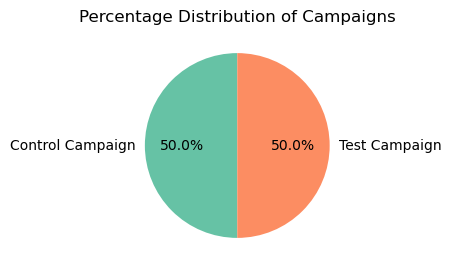

In [23]:
# 3. Pie chart to show the percentage split between campaigns
plt.figure(figsize=(3,3))
# Count values for each campaign
campaign_counts = df['campaign_name'].value_counts()
plt.pie(campaign_counts, labels=campaign_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Campaigns')
plt.show()

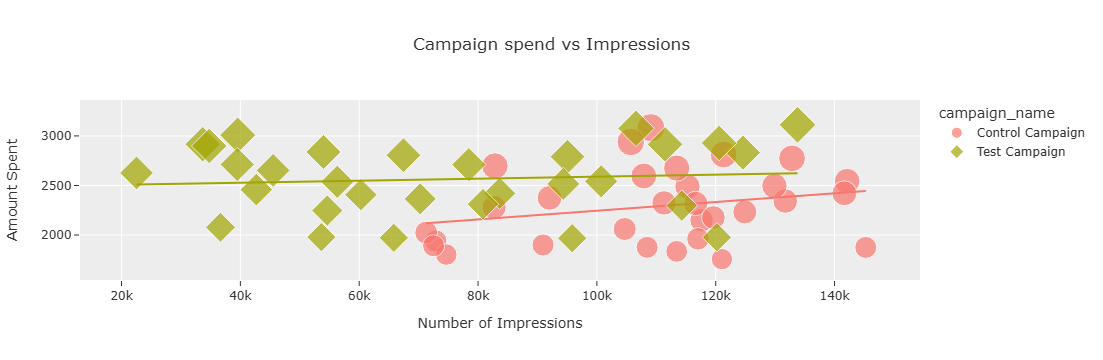

In [24]:
import plotly.express as px

fig = px.scatter(
    df, 
    x='impressions', 
    y='amount_spend', 
    color='campaign_name', 
    trendline="ols", 
    symbol='campaign_name', 
    size='amount_spend',
    title="Campaign spend vs Impressions",
    labels={'impressions': 'Number of Impressions', 'amount_spend': 'Amount Spent'},
    template="ggplot2" 
)

fig.show()


**Control Campaign** : There's a slight upward trend,suggesting that as impressions increases , the amount spent also trends to increase slightly.

**Test Campaign** : The trend line for the test campaign is almost flat,indicating that spending remains consistent regardless of the number of impressions. 

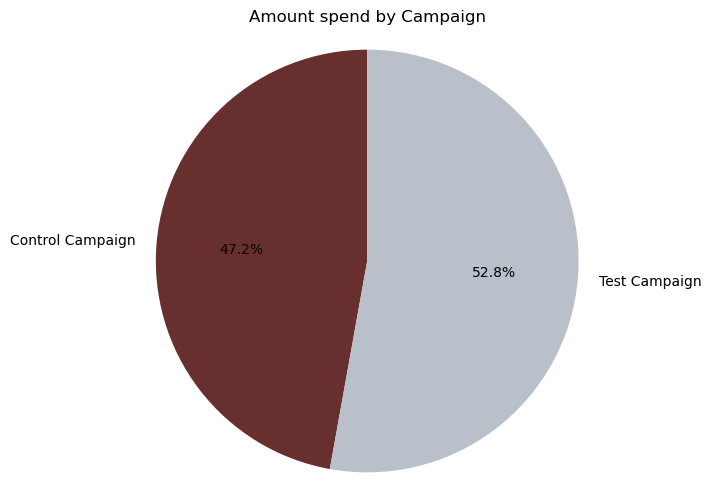

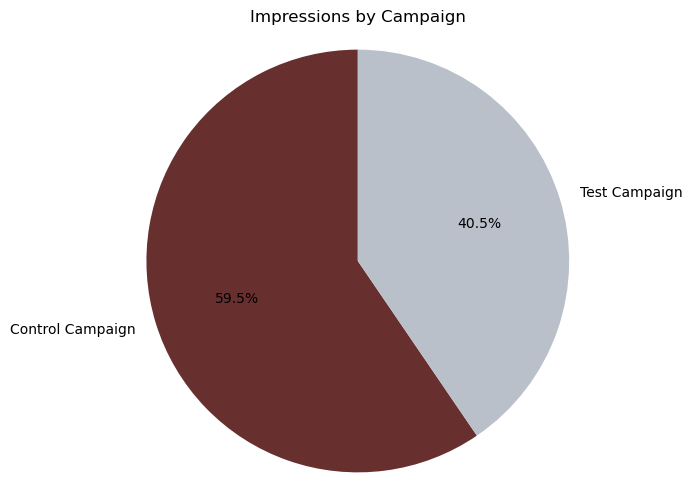

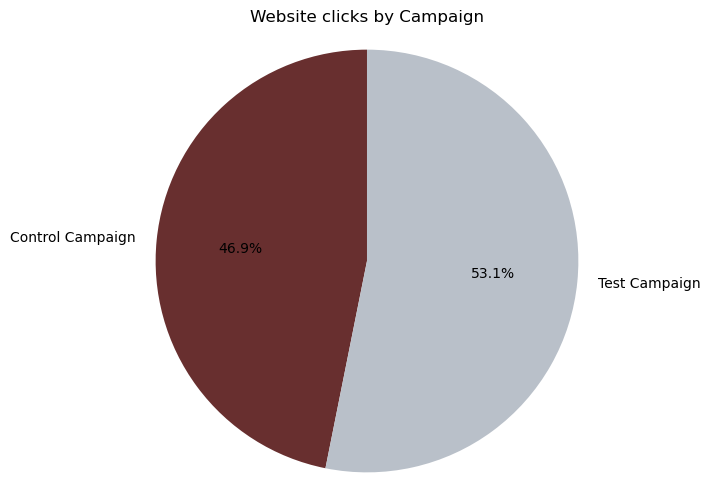

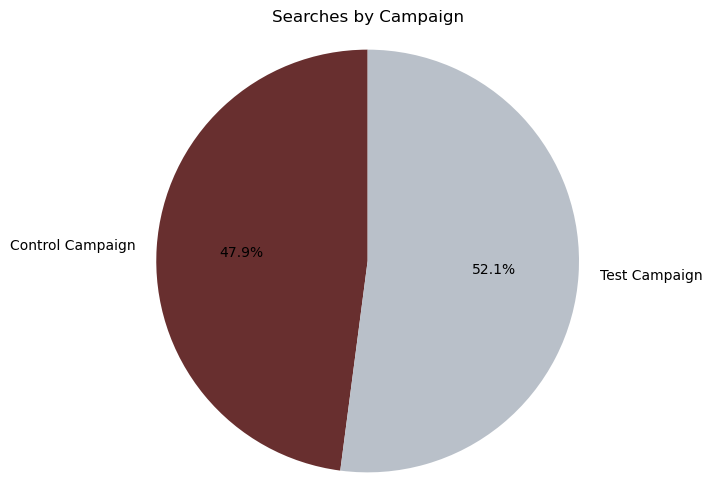

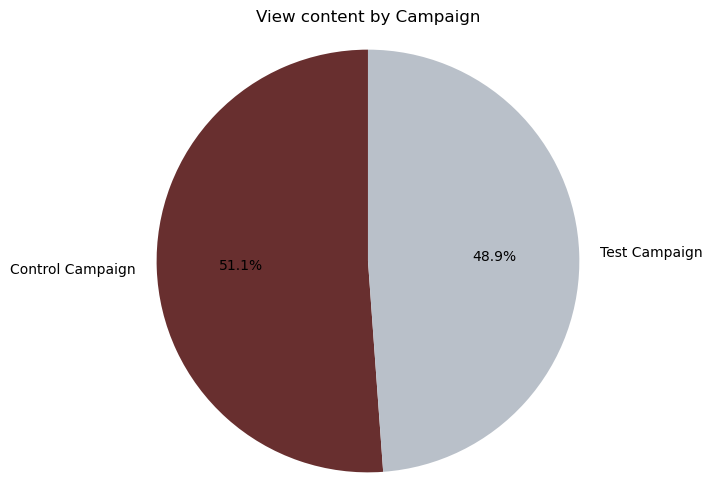

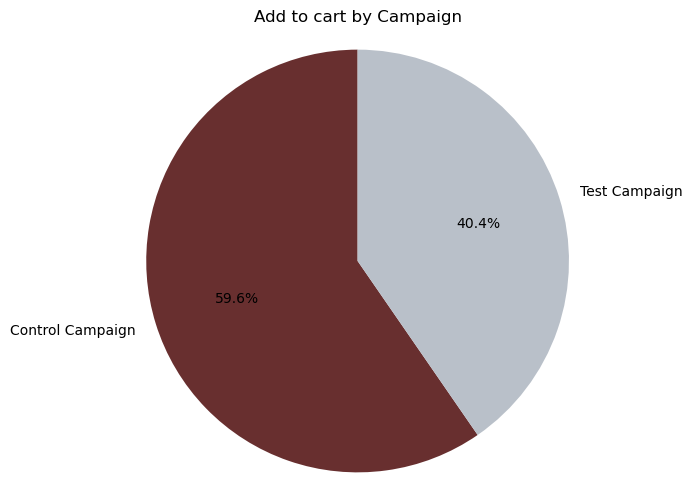

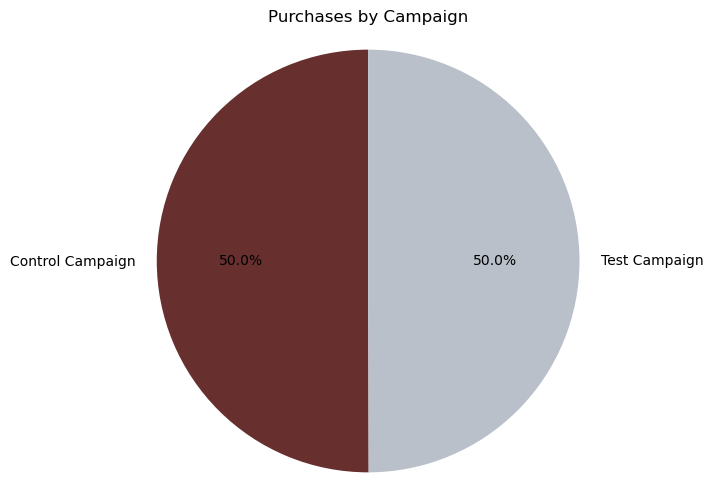

In [25]:
columns_to_plot = ['amount_spend', 'impressions', 'website_clicks', 'searches', 'view_content', 'add_to_cart', 'purchases']

for column in columns_to_plot:
    data = df.groupby('campaign_name')[column].sum()
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=["#682F2F", "#B9C0C9"])
    plt.title(f'{column.replace("_", " ").capitalize()} by Campaign')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

In [26]:
engagement_metrics = ['website_clicks', 'view_content', 'add_to_cart', 'purchases']
grouped_data=df.groupby('campaign_name')[engagement_metrics].mean()
grouped_data

website_clicks  view_content  add_to_cart   purchases
campaign_name                                                          
Control Campaign     5317.566667   1945.133333  1301.300000  522.066667
Test Campaign        6032.333333   1858.000000   881.533333  521.233333

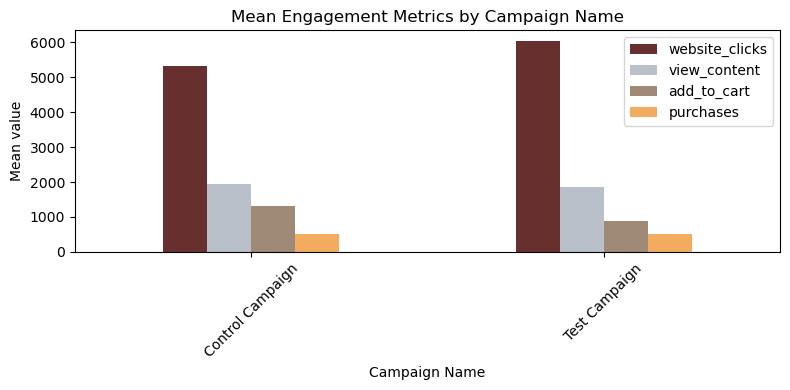

In [27]:
custom_palette = ["#682F2F","#B9C0C9","#9F8A78","#F3AB60"]
grouped_data.plot(kind='bar', figsize=(8,4),color=custom_palette)
plt.title('Mean Engagement Metrics by Campaign Name')
plt.xlabel('Campaign Name')
plt.ylabel('Mean value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
df.head(2)

campaign_name       date  amount_spend  impressions   reach  \
0  Control Campaign 2019-08-01          2280        82702   56930   
1  Control Campaign 2019-08-02          1757       121040  102513   

   website_clicks  searches  view_content  add_to_cart  purchases  
0            7016      2290          2159         1819        618  
1            8110      2033          1841         1219        511

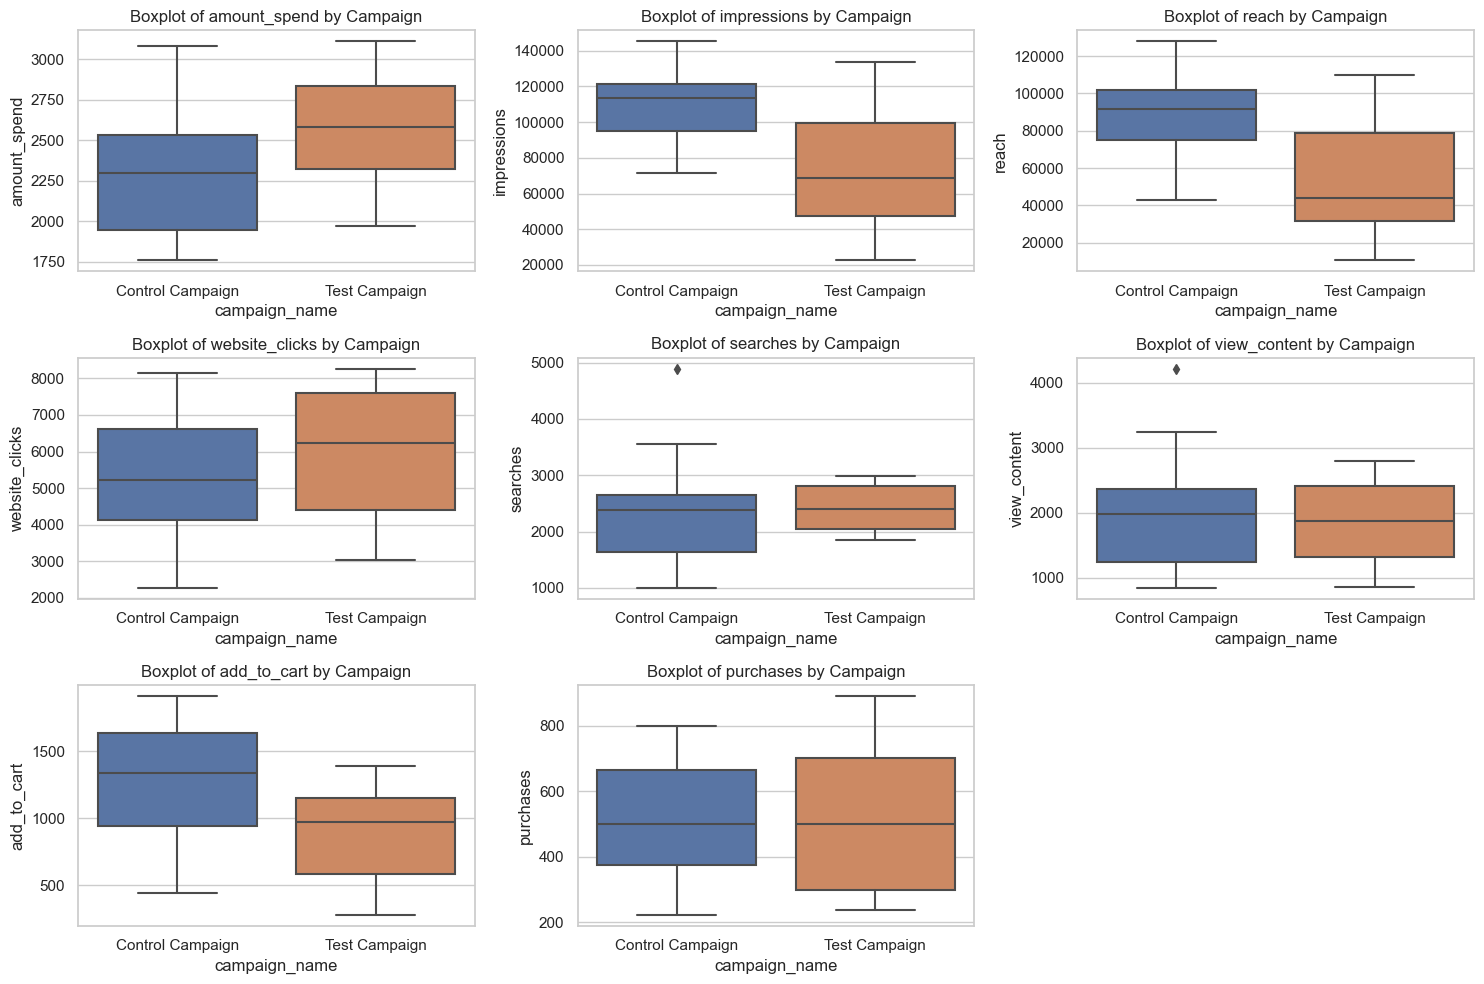

In [29]:
features = ['amount_spend', 'impressions', 'reach', 'website_clicks', 'searches', 'view_content', 'add_to_cart', 'purchases']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, col in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='campaign_name', y=col)
    plt.title(f'Boxplot of {col} by Campaign')

plt.tight_layout()
plt.show()

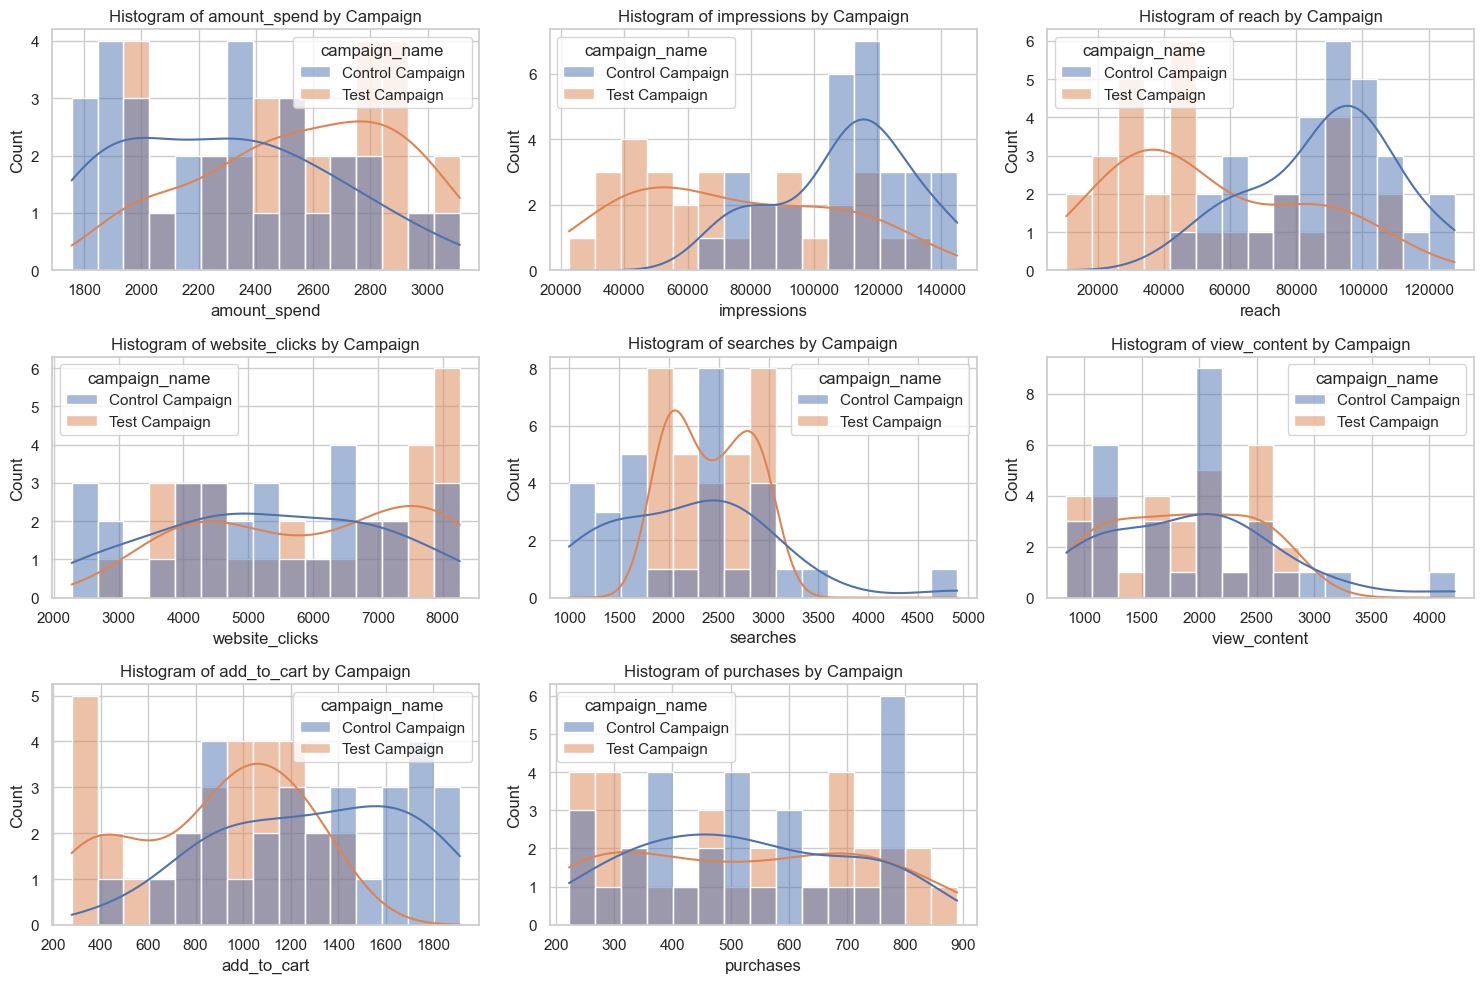

In [30]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(features, start=1):
    plt.subplot(3, 3, i)  # Adjusted to fit more plots in a grid
    sns.histplot(data=df, x=col, hue="campaign_name", kde=True, bins=15)
    plt.title(f'Histogram of {col} by Campaign')

plt.tight_layout()
plt.show()

### 1. Performance Comparison Between Campaigns:

In [31]:
df['CTR']=(df['website_clicks']/df['impressions'])*100
df['CR']=(df['purchases']/df['website_clicks'])*100
df['CPC'] = df['amount_spend'] / df['website_clicks']
df['CPP'] = df['amount_spend'] / df['purchases']

In [32]:
df.head()

campaign_name       date  amount_spend  impressions   reach  \
0  Control Campaign 2019-08-01          2280        82702   56930   
1  Control Campaign 2019-08-02          1757       121040  102513   
2  Control Campaign 2019-08-03          2343       131711  110862   
3  Control Campaign 2019-08-04          1940        72878   61235   
4  Control Campaign 2019-08-05          1835       113430   91579   

   website_clicks  searches  view_content  add_to_cart  purchases       CTR  \
0            7016      2290          2159         1819        618  8.483471   
1            8110      2033          1841         1219        511  6.700264   
2            6508      1737          1549         1134        372  4.941121   
3            3065      1042           982         1183        340  4.205659   
4            5224      2390          1984         1339        501  4.605484   

          CR       CPC       CPP  
0   8.808438  0.324971  3.689320  
1   6.300863  0.216646  3.438356  
2   5.716042  0.360018  6.298387  
3  11.092985  0.632953  5.705882  
4   9.590352  0.351263  3.662675

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 29
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_name   60 non-null     object        
 1   date            60 non-null     datetime64[ns]
 2   amount_spend    60 non-null     int64         
 3   impressions     60 non-null     int64         
 4   reach           60 non-null     int64         
 5   website_clicks  60 non-null     int64         
 6   searches        60 non-null     int64         
 7   view_content    60 non-null     int64         
 8   add_to_cart     60 non-null     int64         
 9   purchases       60 non-null     int64         
 10  CTR             60 non-null     float64       
 11  CR              60 non-null     float64       
 12  CPC             60 non-null     float64       
 13  CPP             60 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usag

In [34]:
# Aggregating metrics by campaigns 
metrics =['CTR','CR','CPC','CPP']
avg_metrics = df.groupby('campaign_name')[metrics].mean().reset_index()
avg_metrics

campaign_name        CTR         CR       CPC       CPP
0  Control Campaign   5.079525  11.414308  0.490120  5.006017
1     Test Campaign  10.242260   9.231182  0.468718  5.899589

In [35]:
df.shape

(60, 14)

In [36]:
#stats = df.groupby('campaign_name')[['CTR', 'CR', 'CPC', 'CPP']].describe()
#stats.T

In [37]:
summary_stats = df.groupby('campaign_name').agg({
    'CTR': ['mean', 'median', 'std', 'min', 'max'],
    'CR': ['mean', 'median', 'std', 'min', 'max'],
    'CPC': ['mean', 'median', 'std', 'min', 'max'],
    'CPP': ['mean', 'median', 'std', 'min', 'max']
    
})
summary_stats

CTR                                           \
                       mean    median       std       min        max   
campaign_name                                                          
Control Campaign   5.079525  4.662837  2.017089  1.857546   8.830912   
Test Campaign     10.242260  8.035887  6.770897  2.982351  33.821766   

                         CR                                           \
                       mean    median       std       min        max   
campaign_name                                                          
Control Campaign  11.414308  9.908903  6.728159  3.349427  32.235397   
Test Campaign      9.231182  8.454291  4.448987  3.008850  21.085051   

                       CPC                                               CPP  \
                      mean    median       std       min       max      mean   
campaign_name                                                                  
Control Campaign  0.490120  0.415927  0.218749  0.216646  1.037626  5.006017   
Test Campaign     0.468718  0.448842  0.178566  0.248799  0.990125  5.899589   

                                                           
                    median       std       min        max  
campaign_name                                              
Control Campaign  4.366779  2.095615  2.253750   9.806306  
Test Campaign     5.062840  2.800766  2.428571  12.702041

### Observation
**Click-Thorugh Rate(CTR)**: High CTR indicates that the ad effectively grabs attention and drives clicks.

- **Control Campaign**: 5.079525
- **Test Campaign**: 10.242260
- **Observation**: The Test Campaign demonstrates a significantly higher CTR, indicating that the test campaign is more effective at getting users to click on the ads. 

**Conversion Rate(CR)**: Higher CR indicates better conversion of clicks into purchases.
- **Control Campaign**: 11.414308	
- **Test Campaign**: 9.231182
- **Observation**: The Control Campaign has a slightly higher mean CR (11.41%) than the Test Campaign (9.23%). This implies that, while the test campaign gets more clicks, the control campaign leads to more conversions relative to the number of users interacting with the ads.
  
**Cost Per Click(CPC)**:  Lower CPC indicates more cost-efficient clicks.
- **Control Campaign**: 0.490120	
- **Test Campaign**: 0.468718
- **Observation**: The Test Campaign has a slightly lower CPC  than the Control Campaign. This means the Test Campaign is slightly more cost-effective in generating clicks.

**Cost Per Purchase (CPP)**: Lower CPP indicates more cost-efficient purchases.
- **Control Campaign**: 5.006017
- **Test Campaign**: 5.899589
- **Observation**: The Control Campaign has a lower CPP than the Test Campaign. This indicates that, although the Test Campaign attracts more clicks, the cost to generate a purchase is higher in the Test Campaign than in the Control Campaign.

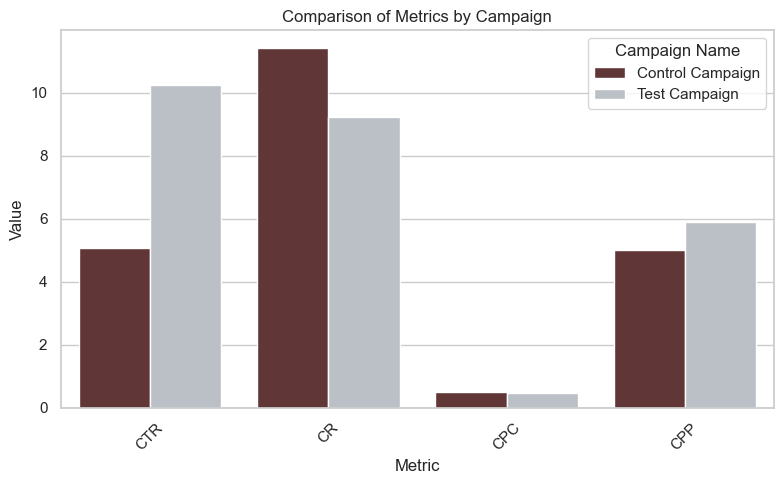

In [38]:
# Melt the DataFrame to long format for easier plotting
df_melted = avg_metrics.melt(id_vars='campaign_name', value_vars=metrics, var_name='Metric', value_name='Value')

custom_palette = ["#682F2F","#B9C0C9"]
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8,5))
sns.barplot(x='Metric', y='Value', hue='campaign_name', data=df_melted, palette=custom_palette)
plt.title('Comparison of Metrics by Campaign')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Campaign Name')
plt.tight_layout()
plt.show()

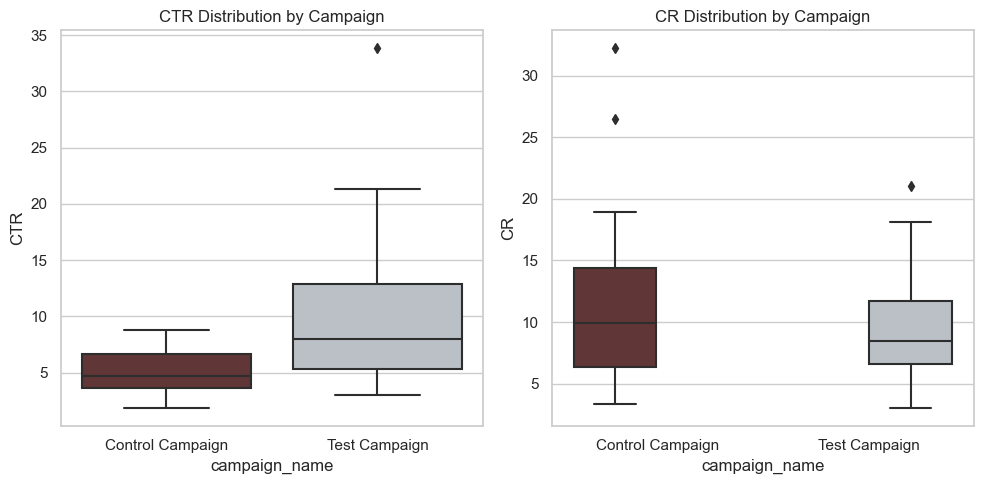

In [39]:
# Box plots
custom_palette = ["#682F2F","#B9C0C9"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='campaign_name', y='CTR', data=df,hue='campaign_name', dodge=False, ax=axes[0],palette = custom_palette)
axes[0].set_title('CTR Distribution by Campaign')
axes[0].legend().remove()

sns.boxplot(x='campaign_name', y='CR', data=df,hue='campaign_name', ax=axes[1],palette = custom_palette)
axes[1].set_title('CR Distribution by Campaign')
axes[1].legend().remove()

plt.tight_layout()
plt.show()

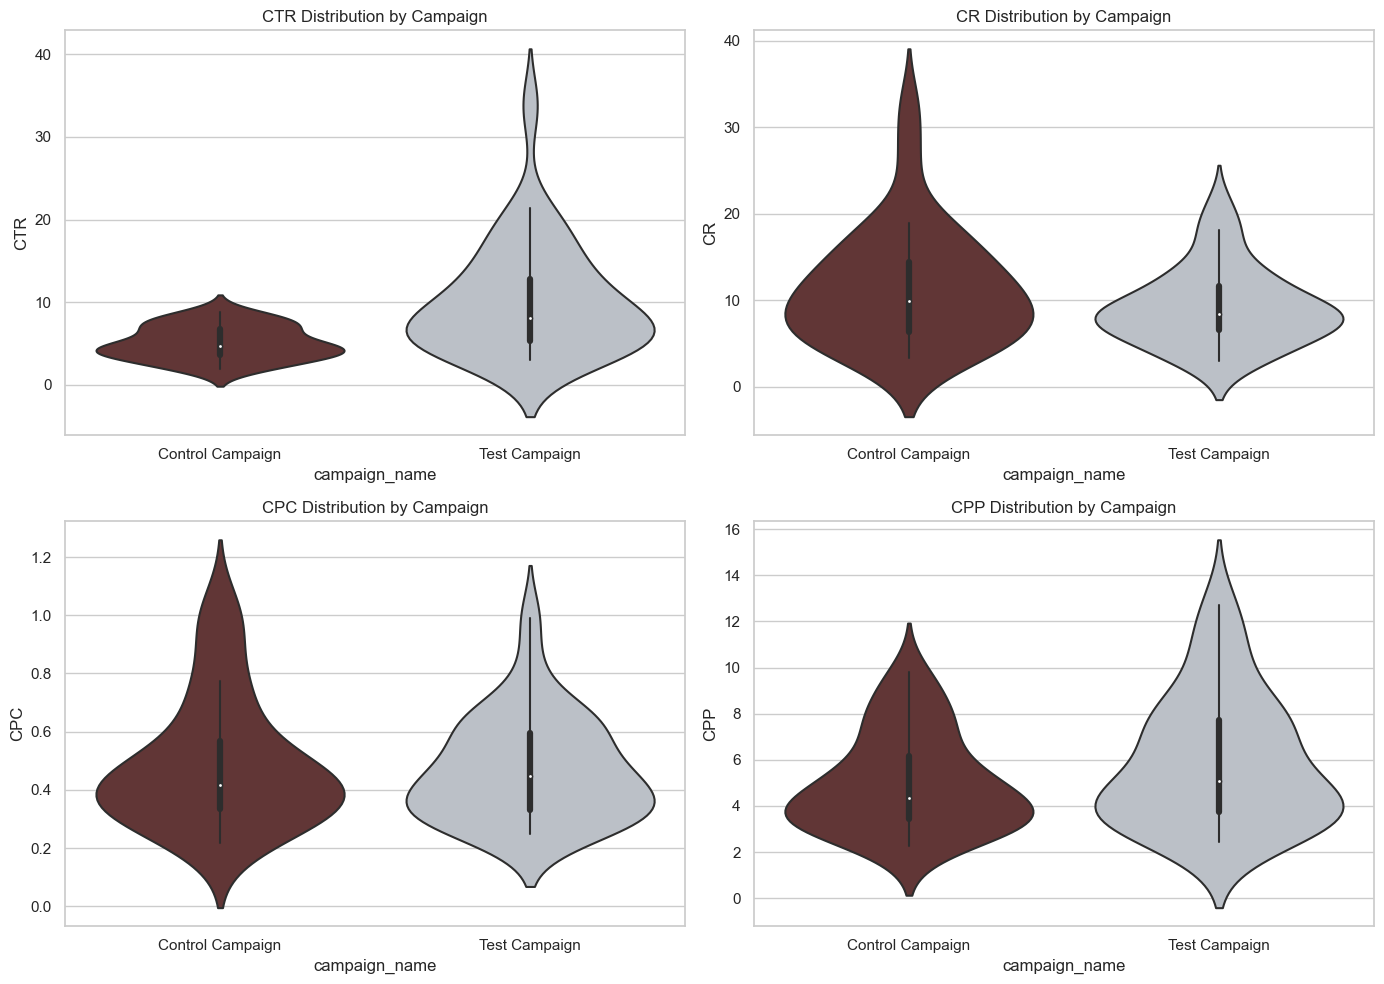

In [40]:
# Create 2x2 subplots for four metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Flatten the axes array for easier iteration
axes = axes.flatten()

metrics = ['CTR', 'CR', 'CPC', 'CPP']
titles = ['CTR Distribution by Campaign', 'CR Distribution by Campaign', 
          'CPC Distribution by Campaign', 'CPP Distribution by Campaign']

for i, metric in enumerate(metrics):
    sns.violinplot(x='campaign_name', y=metric, data=df, hue='campaign_name',dodge=False, ax=axes[i], palette=custom_palette)
    axes[i].set_title(titles[i])
    axes[i].legend().remove()  # Remove duplicate legends for clarity
plt.tight_layout()
plt.show()

The test campaign outperforms the control campaign in both **CTR** and **CR**, indicating higher user engagement and conversions. However, it shows more variability and higher costs in **CPC** and **CPP**, suggesting that while it drives better results, it's less cost-efficient in certain cases. Overall, the test campaign delivers stronger performance but at a potentially higher cost, requiring a careful assessment of whether the increased conversions justify the additional spend.

# Normality Check
The **Shapiro-Wilk** test assesses whether a dataset follows a normal distribution. The test outputs a p-value that helps in making this determination:

- If the p-value is less than 0.05, we reject the null hypothesis and conclude that the data does not follow a normal distribution.

- If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning the data follows a normal distribution.
This test helps determine if the data meets the assumption of normality required for certain statistical tests.

In [41]:
columns_to_test = ['amount_spend', 'impressions', 'reach','website_clicks', 'searches', 'view_content', 'add_to_cart','purchases', 'CTR', 'CR', 'CPC', 'CPP']

In [42]:
for column in columns_to_test:
    stat,pvalue = stats.shapiro(df[column])

    print(f"Column:{column}")
    print(f"Shapiro-Wilk Test Stat = {stat:.4f},p-value = {pvalue:.4f}")

    # interpretation based on p-value
    if pvalue < 0.05:
        print("The data in this column dose not follow a normal distributuion.")
    else:
        print("The data in this column follow a normal distribution.")
    print("-"*50)

Column:amount_spend
Shapiro-Wilk Test Stat = 0.9601,p-value = 0.0475
The data in this column dose not follow a normal distributuion.
--------------------------------------------------
Column:impressions
Shapiro-Wilk Test Stat = 0.9509,p-value = 0.0173
The data in this column dose not follow a normal distributuion.
--------------------------------------------------
Column:reach
Shapiro-Wilk Test Stat = 0.9585,p-value = 0.0399
The data in this column dose not follow a normal distributuion.
--------------------------------------------------
Column:website_clicks
Shapiro-Wilk Test Stat = 0.9476,p-value = 0.0120
The data in this column dose not follow a normal distributuion.
--------------------------------------------------
Column:searches
Shapiro-Wilk Test Stat = 0.9445,p-value = 0.0086
The data in this column dose not follow a normal distributuion.
--------------------------------------------------
Column:view_content
Shapiro-Wilk Test Stat = 0.9497,p-value = 0.0151
The data in this colu

The **Shapiro-Wilk test** shows that most of the columns **do not follow a normal distribution**, as their p-values are below the significance threshold of 0.05. The only column that follows a **normal distribution** is **add_to_cart**(p-value = 0.2799)

- We tested the data and found it did not meet the usual assumptions for some traditional tests, so we used alternative methods that give more reliable comparisons between the two campaigns

# Hypothesis Testing with Mann-Whitney U Test

Given that the data does not follow a normal distribution, we will use the **Mann-Whitney U Statistic** to compare the two independent groups: Control Campaign and Test Campaign.

- **Null Hypothesis (H₀)**: The distributions of the two groups (Control and Test Campaign) are identical.
- **Alternative Hypothesis (H₁)**: The distributions of the two groups are different.

This test will help determine if there is a statistically significant difference between the spending patterns of the Control and Test Campaigns.


In [43]:
control_purchases = df[df['campaign_name'] == 'Control Campaign']['purchases']
test_purchases = df[df['campaign_name'] == 'Test Campaign']['purchases']

stat, p_value = mannwhitneyu(control_purchases,test_purchases)
print(f'Mann-Whitney U Statistic: {stat}, p-value: {p_value}')

Mann-Whitney U Statistic: 454.0, p-value: 0.9587274804787155


There is no significant difference in the number of purchases between the Control and Test campaigns, meaning both are performing similarly in terms of driving purchases.

In [44]:
control_amount_spend= df[df['campaign_name'] == 'Control Campaign']['amount_spend']
test_amount_spend = df[df['campaign_name'] == 'Test Campaign']['amount_spend']

stat,p_value = mannwhitneyu(control_amount_spend,test_amount_spend)
print(f'Mann-Whitney U Statistic: {stat}, p-value: {p_value}')

Mann-Whitney U Statistic: 257.0, p-value: 0.004427193167173018


Conclusion: There is a significant difference in the amount spent between the Control and Test campaigns

In [45]:
control_cr = df[df['campaign_name'] == 'Control Campaign']['CR']
test_cr = df[df['campaign_name'] == 'Test Campaign']['CR']
stat,p_value = mannwhitneyu(control_cr,test_cr)
print(f'Mann-Whitney U Statistic: {stat},p-value: {p_value}')

Mann-Whitney U Statistic: 523.0,p-value: 0.2837780479456242


- The p-value (0.2838) is greater than the significance level of 0.05, so we fail to reject the null hypothesis.
- Thus, no statistically significant difference in CR exists between the Control Campaign and the Test Campaign.

In [46]:
control_ctr = df[df['campaign_name'] == 'Control Campaign']['CTR']
test_ctr = df[df['campaign_name'] == 'Test Campaign']['CTR']
stat,p_value = mannwhitneyu(control_ctr,test_ctr)
print(f'Mann-Whitney U Statistic: {stat},p-value: {p_value}')

Mann-Whitney U Statistic: 197.0,p-value: 0.00018916193602108462


- Since the p-value (0.000189) is much smaller than the typical significance level of 0.05,we will reject the null hypothesis.
- This means that there is a statistically significant difference in the CTR between the Control Campaign and the Test Campaign.

In [47]:
control_cpc = df[df['campaign_name'] == 'Control Campaign']['CPC']
test_cpc = df[df['campaign_name'] == 'Test Campaign']['CPC']
stat,p_value = mannwhitneyu(control_cpc,test_cpc)
print(f'Mann-Whitney U Statistic: {stat},p-value: {p_value}')

Mann-Whitney U Statistic: 461.0,p-value: 0.8766349003139949


- The p-value (0.8766) is much larger than the typical significance level of 0.05. This means we fail to reject the null hypothesis.
- In other words, there is no statistically significant difference in CPC between the Control and Test Campaigns.

In [48]:
control_cpp = df[df['campaign_name'] == 'Control Campaign']['CPP']
test_cpp = df[df['campaign_name'] == 'Test Campaign']['CPP']
stat,p_value = mannwhitneyu(control_cpp,test_cpp)
print(f'Mann-Whitney U Statistic: {stat},p-value: {p_value}')

Mann-Whitney U Statistic: 369.0,p-value: 0.2339889162810581


- We fail to reject the null hypothesis because the p-value (0.234) is greater than the typical significance level of 0.05.
- This indicates that there is no statistically significant difference in CPP between the Control Campaign and the Test Campaign.

In [49]:
from sklearn.ensemble import RandomForestRegressor

features = ['amount_spend', 'impressions', 'reach', 'website_clicks', 'searches', 'view_content', 'add_to_cart']
target = df['purchases']

rf_model = RandomForestRegressor()
rf_model.fit(df[features], target)

importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
importance.sort_values(by='Importance', ascending=False, inplace=True)
print(importance)

          Feature  Importance
6     add_to_cart    0.366369
4        searches    0.155752
5    view_content    0.116690
3  website_clicks    0.102242
0    amount_spend    0.093385
2           reach    0.090495
1     impressions    0.075069


# Final Conclusion 
The Test Campaign drove higher user engagement but came at the expense of cost efficiency, while the Control Campaign led to more cost-effective conversions. Future campaigns should focus on optimizing high-engagement actions like "add to cart" and "searches," alongside improving cost-efficiency strategies to strike a balance between user engagement and ROI.